Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
df = pd.read_csv("train.csv")

In [ ]:
print(df.info())

print("Indeces:", df.columns.tolist())
print("Data types:")
print(df.dtypes)

print(df.head())

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

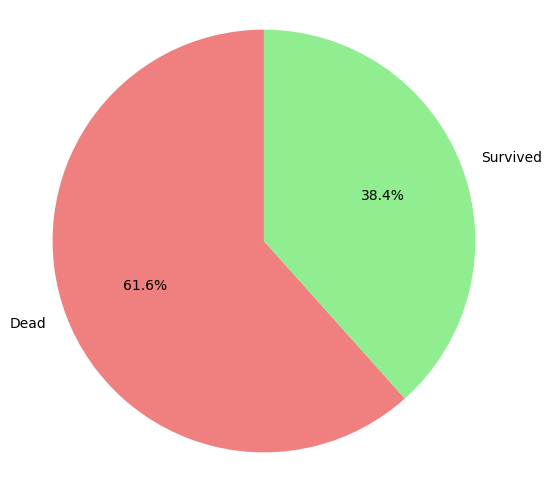

In [7]:
survival_counts = df['Survived'].value_counts()
labels = ['Dead', 'Survived']

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.axis('equal')
plt.show()

Отримані дані з кругової діаграми показують розподіл між тими, хто вижив і хто загинув під час катастрофи «Титаніка».

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


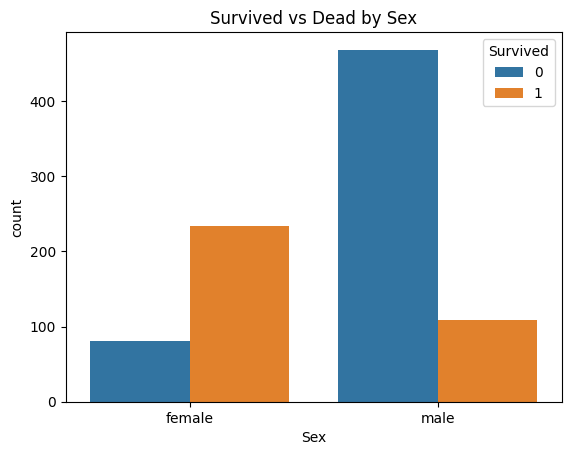

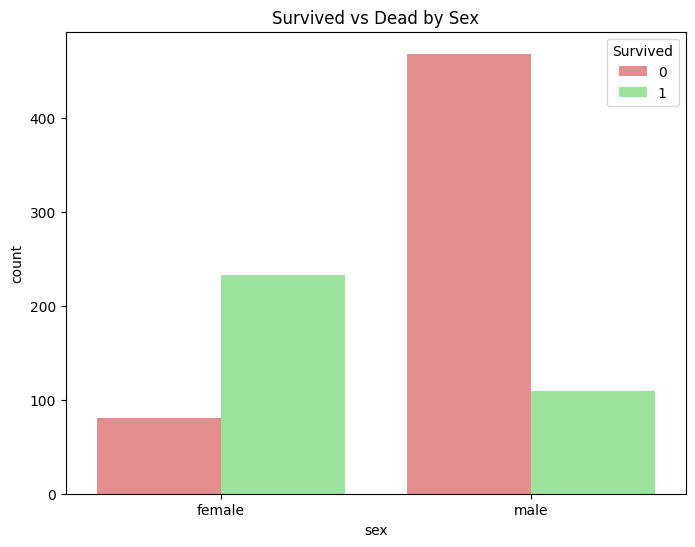

In [12]:
gender_survival = df.groupby(['Sex', 'Survived'], as_index=False).size()

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_survival, x='Sex', y='size', hue='Survived', palette=['lightcoral', 'lightgreen'])
plt.title('Survived vs Dead by Sex')
plt.xlabel('sex')
plt.ylabel('count')
plt.show()

Жінки мали значно вищі шанси на виживання

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

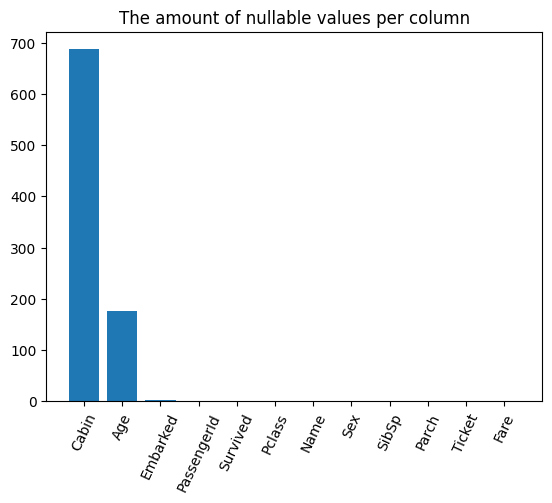

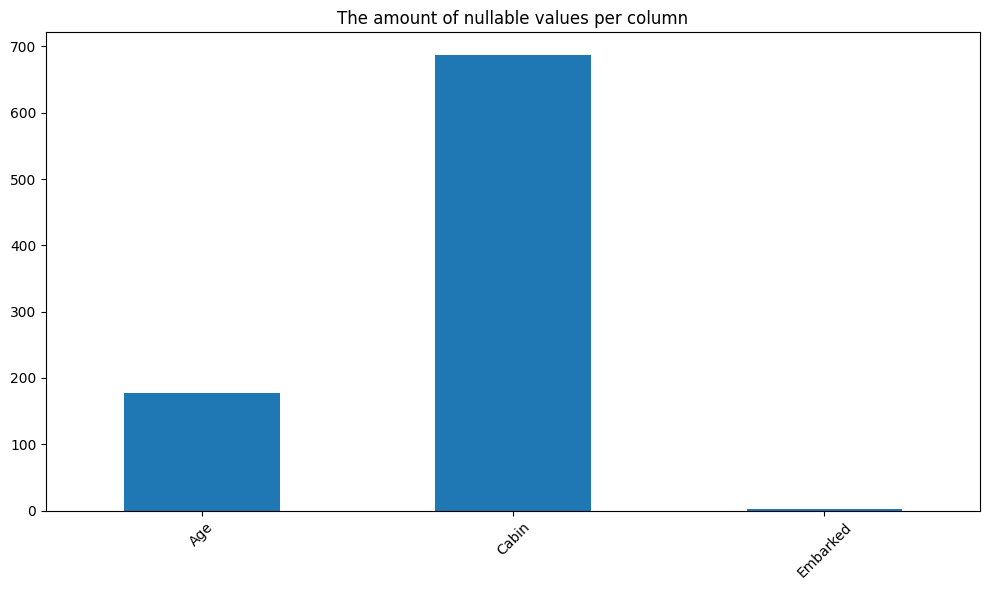

In [14]:
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(10, 6))
missing.plot(kind='bar')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Змінна "Cabin" має найбільшу кількість пропущених значень - близько 700. Це типово для багатьох датасетів Титаніка, оскільки інформація про каюти багатьох пасажирів не збереглася.
Змінна "Age"  має приблизно 180 пропущених значень. Це також досить поширена проблема, оскільки для частини пасажирів інформація про вік могла бути невідомою або не зафіксованою.
Змінна "Embarked" має дуже мало пропущених значень - лише кілька записів.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

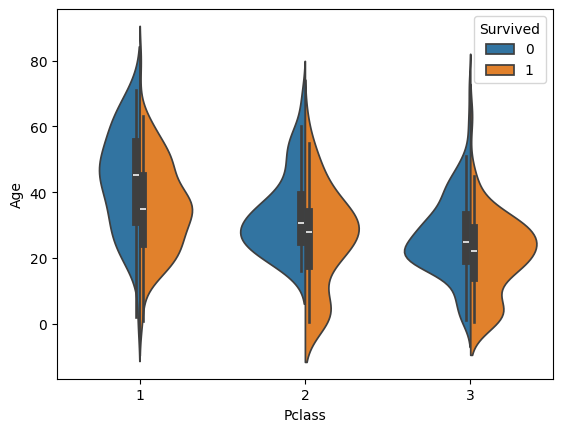

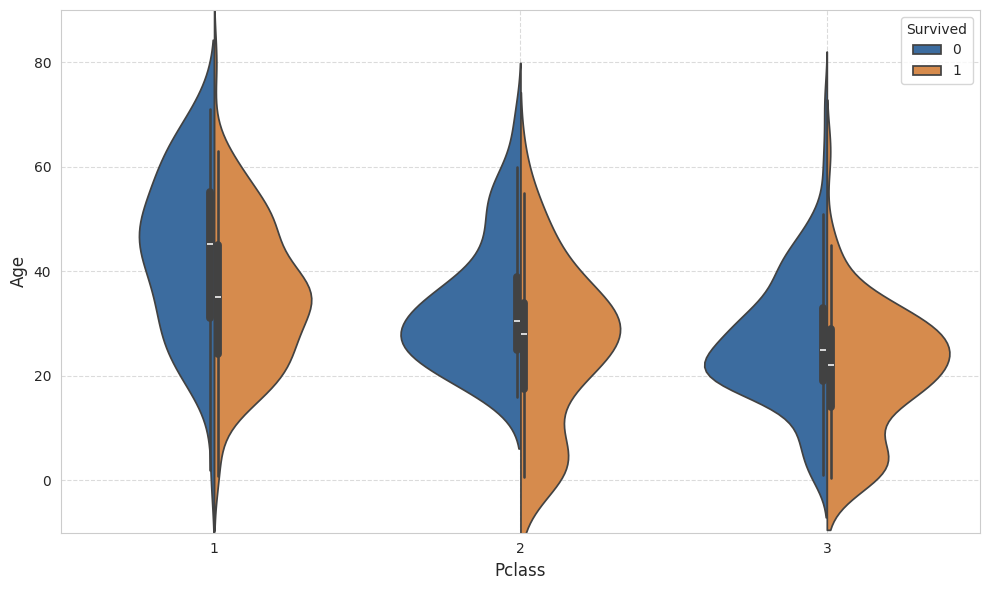

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

ax = sns.violinplot(x='Pclass', y='Age', hue='Survived',
                   data=df, palette=['#2b6cb0', '#ed8936'],
                   split=True, inner='box')

plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Age', fontsize=12)

handles, labels = ax.get_legend_handles_labels()

plt.grid(True, linestyle='--', alpha=0.7)

plt.ylim(-10, 90)

plt.tight_layout()
plt.show()

У всіх класах діти мали вищі шанси на виживання
У першому класі виживання було найвищим у всіх вікових групах
У третьому класі найбільший розрив між загиблими і тими, хто вижив
З підвищенням класу каюти підвищувались шанси на виживання незалежно від віку

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


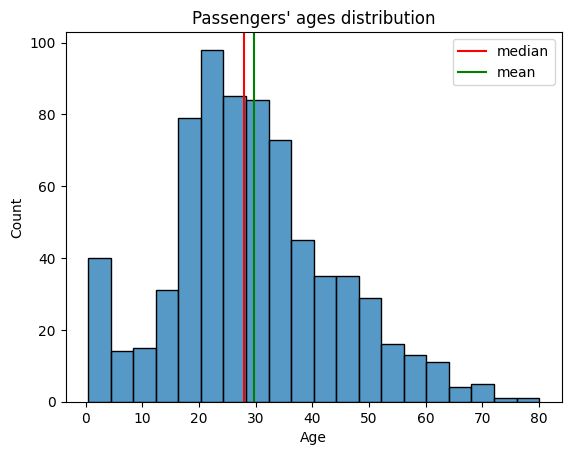

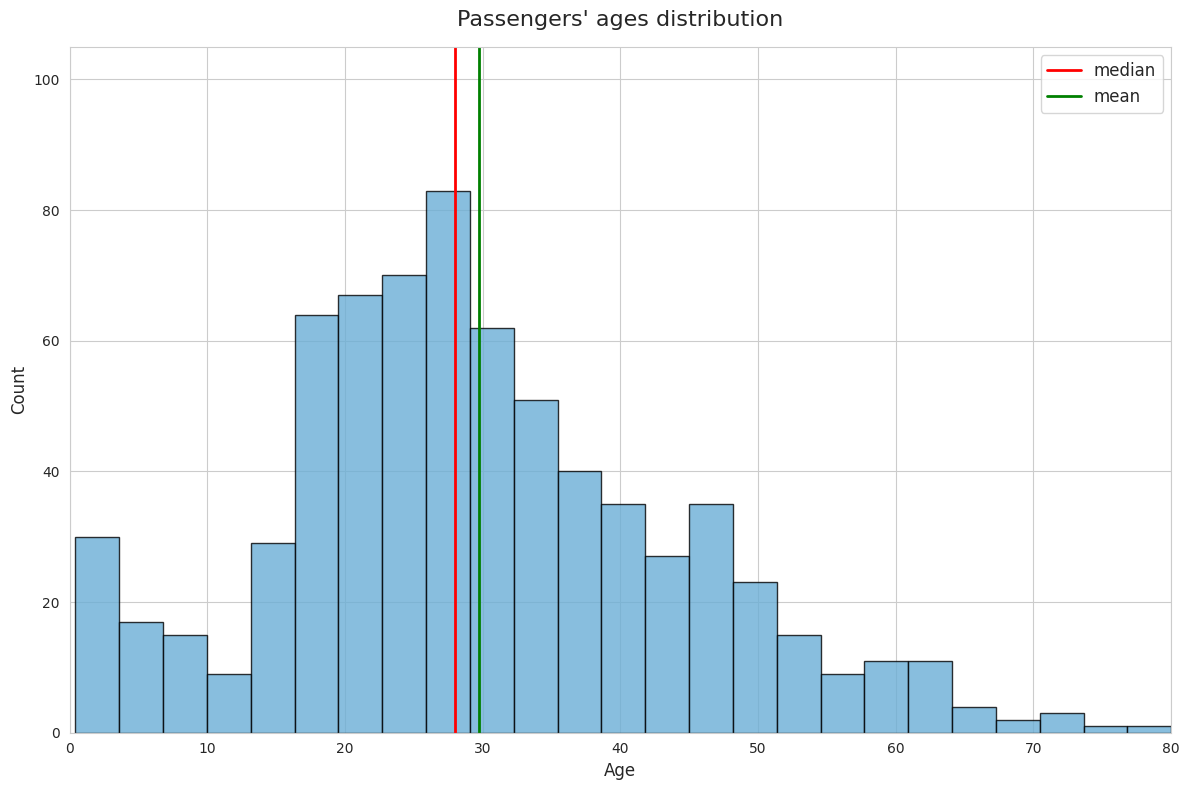

In [22]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

ax = plt.hist(df['Age'].dropna(), bins=25, color='#6baed6', edgecolor='black', alpha=0.8)

median_age = df['Age'].median()
mean_age = df['Age'].mean()

plt.axvline(median_age, color='red', linestyle='-', linewidth=2, label='median')
plt.axvline(mean_age, color='green', linestyle='-', linewidth=2, label='mean')

plt.title('Passengers\' ages distribution', fontsize=16, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0, 80)
plt.ylim(0, 105)

plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

Найбільша концентрація пасажирів спостерігається у віковому діапазоні 20-30 років
Помітний окремий пік у віковому діапазоні 0-5 років (приблизно 40 пасажирів) — це діти, що подорожували з батьками
"Провал" у діапазоні 5-15 років, що вказує на меншу кількість дітей шкільного віку
Поступове зменшення кількості пасажирів старшого віку відображає типову демографічну тенденцію того часу та меншу схильність літніх людей до подорожей

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як соціально-демографічні характеристики пасажирів (стать, вік, клас каюти) вплинули на ймовірність виживання під час катастрофи Титаніка, і які висновки можна зробити для оптимізації процедур евакуації та безпеки на пасажирських суднах?

<ipython-input-23-1380a37251b9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family_Size', y='Survived', data=survival_by_family, palette='Blues_d', ax=axes[1, 0])
<ipython-input-23-1380a37251b9>:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_matrix = df.pivot_table(index=['Sex', 'Pclass'],


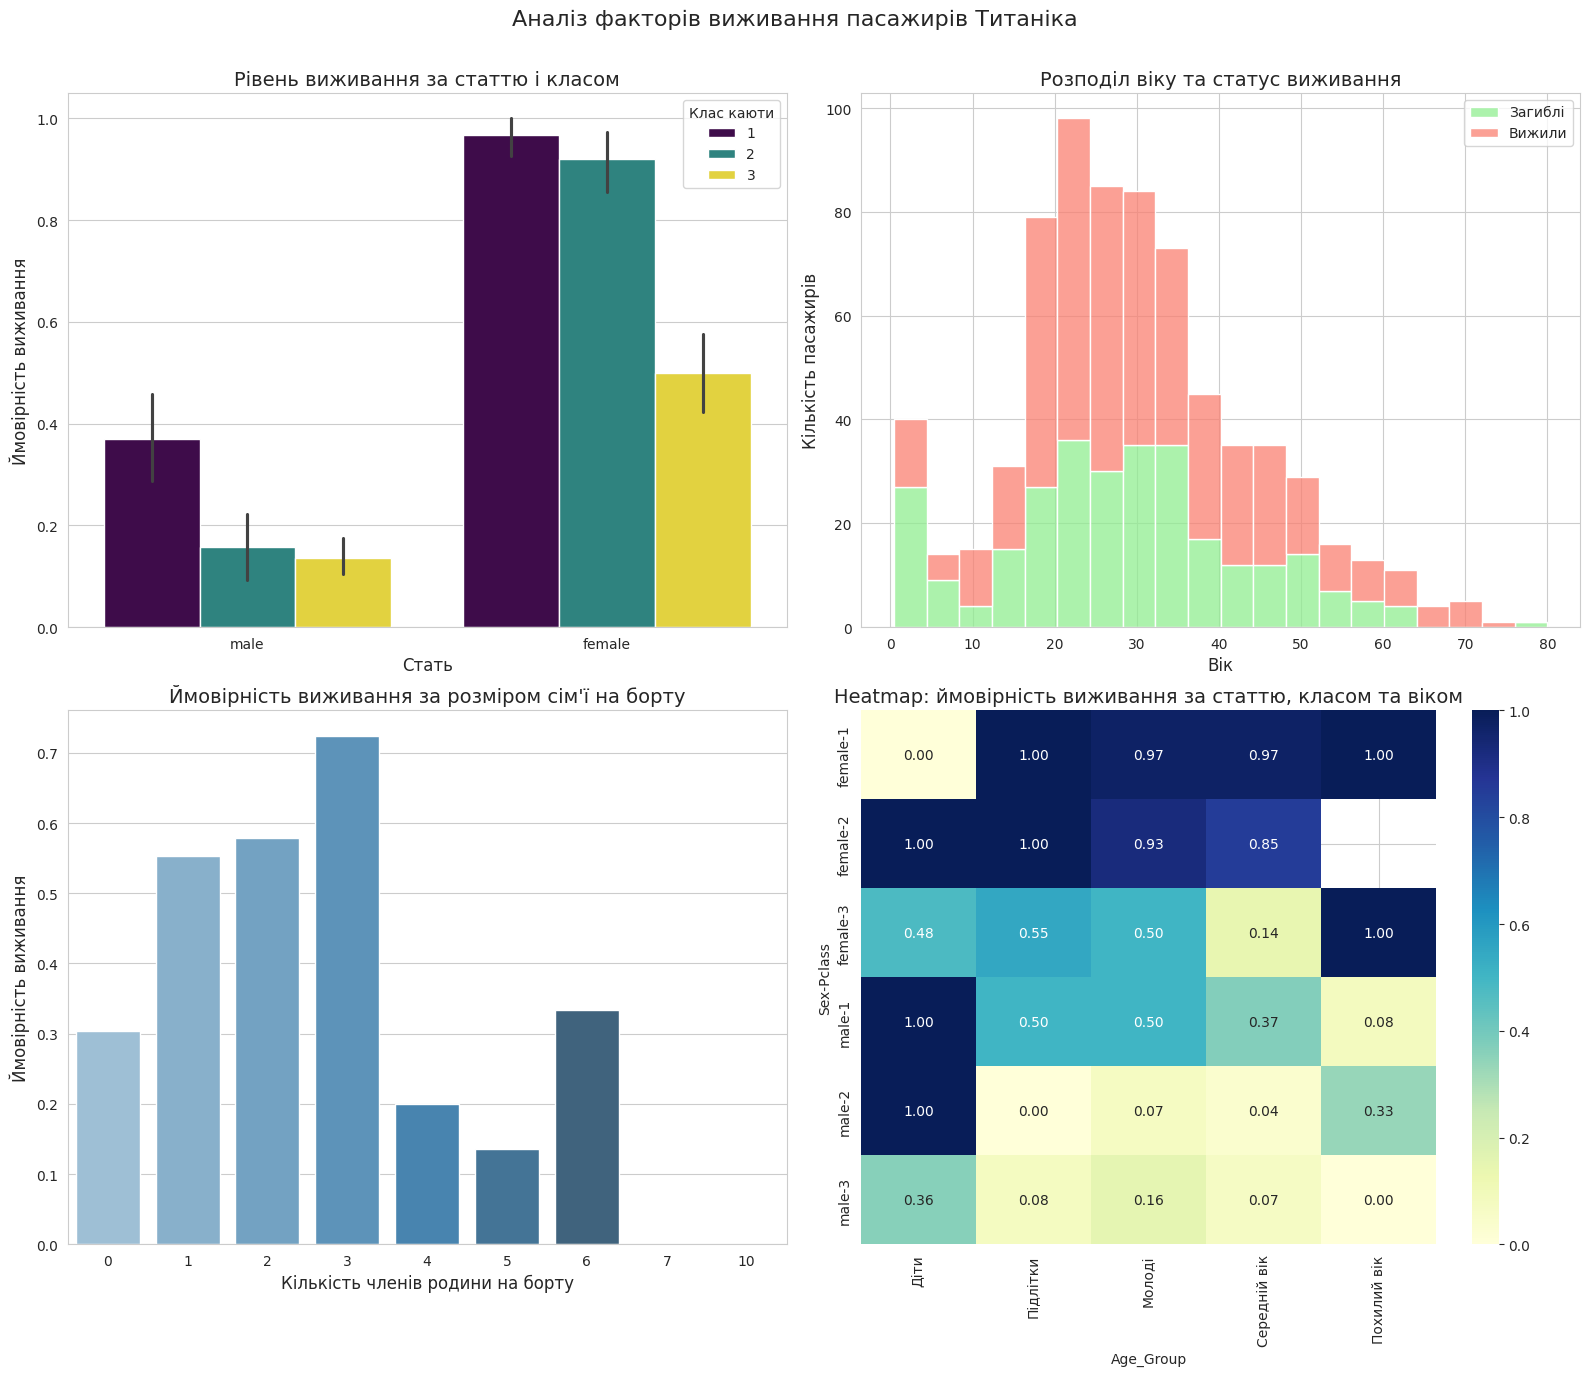

In [23]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Рівень виживання за статтю і класом', fontsize=14)
axes[0, 0].set_ylabel('Ймовірність виживання', fontsize=12)
axes[0, 0].set_xlabel('Стать', fontsize=12)
axes[0, 0].legend(title='Клас каюти')

sns.histplot(data=df, x='Age', hue='Survived', multiple='stack',
             bins=20, palette=['salmon', 'lightgreen'], ax=axes[0, 1])
axes[0, 1].set_title('Розподіл віку та статус виживання', fontsize=14)
axes[0, 1].set_ylabel('Кількість пасажирів', fontsize=12)
axes[0, 1].set_xlabel('Вік', fontsize=12)
axes[0, 1].legend(['Загиблі', 'Вижили'])

df['Family_Size'] = df['SibSp'] + df['Parch']
survival_by_family = df.groupby('Family_Size')['Survived'].mean().reset_index()
sns.barplot(x='Family_Size', y='Survived', data=survival_by_family, palette='Blues_d', ax=axes[1, 0])
axes[1, 0].set_title('Ймовірність виживання за розміром сім\'ї на борту', fontsize=14)
axes[1, 0].set_ylabel('Ймовірність виживання', fontsize=12)
axes[1, 0].set_xlabel('Кількість членів родини на борту', fontsize=12)

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                         labels=['Діти', 'Підлітки', 'Молоді', 'Середній вік', 'Похилий вік'])
survival_matrix = df.pivot_table(index=['Sex', 'Pclass'],
                                columns='Age_Group', values='Survived', aggfunc='mean')
sns.heatmap(survival_matrix, annot=True, cmap='YlGnBu', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Heatmap: ймовірність виживання за статтю, класом та віком', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Аналіз факторів виживання пасажирів Титаніка', fontsize=16)
plt.show()

Формальний принцип "жінки і діти спочатку" дійсно працював, але з сильною залежністю від класу
Необхідно розробити чіткіші протоколи евакуації, що забезпечать рівний доступ до рятувальних засобів незалежно від класу каюти

Розподілити рятувальні шлюпки та жилети пропорційно до кількості пасажирів у різних частинах судна
Забезпечити достатню кількість засобів порятунку для всіх пасажирів (на Титаніку їх було недостатньо)

Покращити доступ до рятувальних засобів з нижніх палуб (пасажири третього класу мали обмежений доступ)
Впровадити системи раннього попередження та навігації до аварійних виходів

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

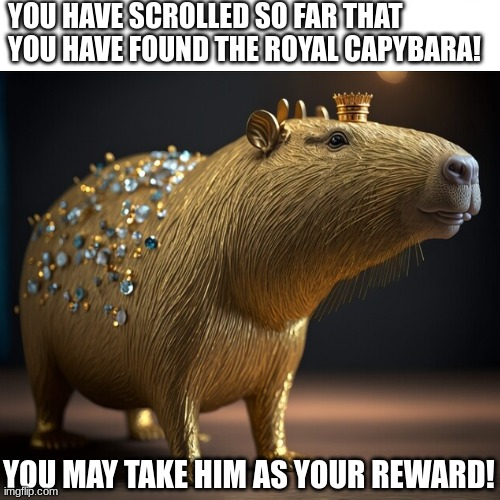